In [1]:
import json
import glob
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from collections import OrderedDict

In [2]:
filedir = "../evaluation"

In [3]:
train_files = glob.glob(filedir + "/*train_accuracies*.json")
test_files = glob.glob(filedir + "/*test_accuracies*.json")

In [4]:
train_metrics = {}
test_metrics = {}

for fdir in train_files:
    epoch = int(fdir.strip(".json").split("epoch_")[1])
    with open(fdir) as f:
        train_metrics[epoch] = json.load(f)

for fdir in test_files:
    epoch = int(fdir.strip(".json").split("epoch_")[1])
    with open(fdir) as f:
        test_metrics[epoch] = json.load(f)

train_metrics = OrderedDict(sorted(train_metrics.items()))
test_metrics = OrderedDict(sorted(test_metrics.items()))

In [3]:
with open("../evaluation/unrel_accuracies.json") as f:
    metrics = json.load(f)

In [5]:
labels = list(train_metrics[1]["named_class_accuracies"].keys())

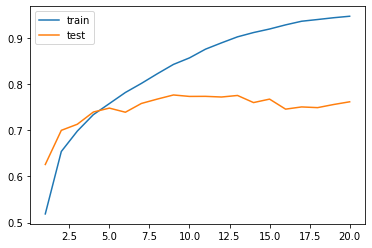

In [6]:
train_epochs = list(train_metrics.keys())
test_epochs = list(test_metrics.keys())
total_accuracies_train = [i["total_accuracy"] for _, i in train_metrics.items()]
total_accuracies_test = [i["total_accuracy"] for _, i in test_metrics.items()]

plt.plot(train_epochs, total_accuracies_train)
plt.plot(test_epochs, total_accuracies_test)
plt.legend(["train", "test"])

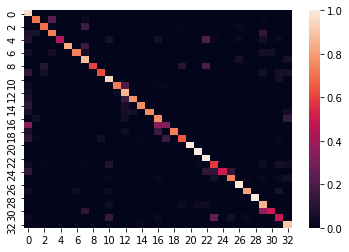

In [7]:
sns.heatmap(metrics["normalized_confusionmatrix"])

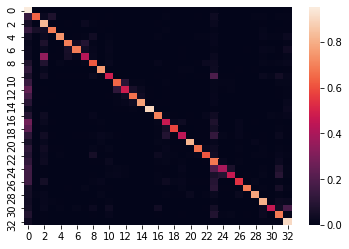

In [10]:
sns.heatmap(train_metrics[3]["normalized_confusion_matrix"])

(0.0, 1.0)

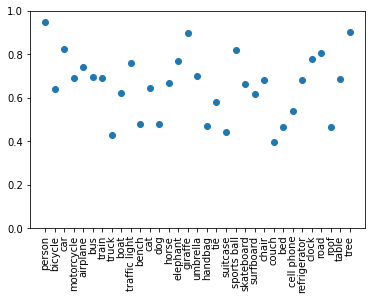

In [43]:
class_accs = [acc for _, acc in train_metrics[3]["named_class_accuracies"].items()]
plt.scatter(labels, class_accs)
plt.xticks(rotation="vertical")
plt.ylim([0,1])